In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Load the dataset
data = pd.read_csv('./data/encoded_data.csv')

# Separate the features and the target variable
X = data.drop('success', axis=1)
y = data['success']

print(data.shape)

(438, 150)


In [2]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Calculate the correlation between features and the target variable
correlations = X_train.corrwith(y_train)

# Set a threshold for considering high correlation
threshold = 0.1

# Find the highly correlated features
highly_correlated_features = correlations[correlations.abs() >= threshold]

# Print the highly correlated features
print("Highly Correlated Features:")
print(highly_correlated_features)

Highly Correlated Features:
cet_oapr           0.122539
science            0.126123
abstract           0.123284
shs_gpa            0.203284
p2                 0.149702
p18                0.113124
p20               -0.108149
p25                0.171315
p26                0.132321
p30                0.168081
p33                0.111000
class_rank_5       0.147252
class_rank_none   -0.103410
high_honor         0.106752
awards_none       -0.116685
income_10k         0.185960
income_na         -0.129571
dtype: float64


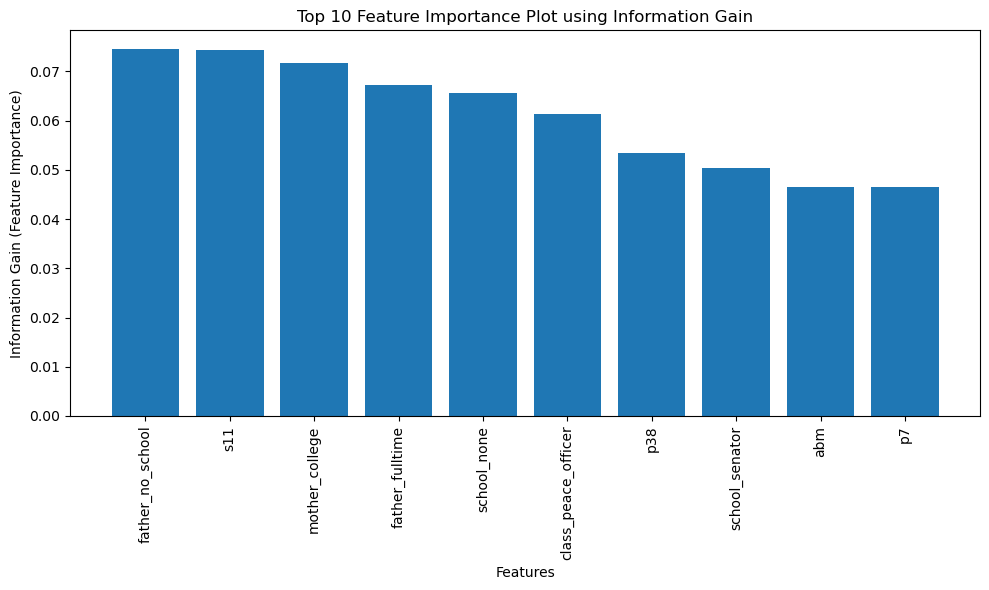

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# Assuming you have already loaded your data into X (features) and y (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances using information gain
feature_importance = mutual_info_classif(X_train, y_train)

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['Feature'], top_10_features['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Information Gain (Feature Importance)')
plt.title('Top 10 Feature Importance Plot using Information Gain')
plt.tight_layout()
plt.show()
